Get Preprocessed Data

In [206]:
import pandas as pd
#upload the deceptive-opinion_processed.csv first
# df = pd.read_csv('deceptive-opinion_processed.csv')
df = pd.read_csv("https://raw.githubusercontent.com/mgcresswell/TCSS555-Project/main/deceptive-opinion_processed.csv")

df.head()

,id,deceptive,hotel,polarity,source,text
0,1,deceptive,hilton,negative,MTurk,stayed schicago hilton day night conference sa...
1,2,deceptive,hilton,negative,MTurk,hotel locate mile train station quite hike tra...
2,3,deceptive,hilton,negative,MTurk,make reservation hilton chicago believe go sta...
3,4,deceptive,hilton,negative,MTurk,people think hilton think luxury know wish hal...
4,5,deceptive,hilton,negative,MTurk,husband recently stayed stayed hilton chicago ...


Get the word count

In [207]:
df['review_words_count']= df.apply(lambda row: len(row.text.split(" ")), axis=1)
df.head()

,id,deceptive,hotel,polarity,source,text,review_words_count
0,1,deceptive,hilton,negative,MTurk,stayed schicago hilton day night conference sa...,131
1,2,deceptive,hilton,negative,MTurk,hotel locate mile train station quite hike tra...,47
2,3,deceptive,hilton,negative,MTurk,make reservation hilton chicago believe go sta...,95
3,4,deceptive,hilton,negative,MTurk,people think hilton think luxury know wish hal...,79
4,5,deceptive,hilton,negative,MTurk,husband recently stayed stayed hilton chicago ...,100


In [208]:
df['review_uniq_count'] = df.apply(lambda row: len(set(row.text.split(" "))), axis=1)
df.head()

,id,deceptive,hotel,polarity,source,text,review_words_count,review_uniq_count
0,1,deceptive,hilton,negative,MTurk,stayed schicago hilton day night conference sa...,131,109
1,2,deceptive,hilton,negative,MTurk,hotel locate mile train station quite hike tra...,47,42
2,3,deceptive,hilton,negative,MTurk,make reservation hilton chicago believe go sta...,95,73
3,4,deceptive,hilton,negative,MTurk,people think hilton think luxury know wish hal...,79,70
4,5,deceptive,hilton,negative,MTurk,husband recently stayed stayed hilton chicago ...,100,82


In [209]:
df['splitted_text']= df.apply(lambda row: set(row.text.split(" ")), axis=1)
df.head()

,id,deceptive,hotel,polarity,source,text,review_words_count,review_uniq_count,splitted_text
0,1,deceptive,hilton,negative,MTurk,stayed schicago hilton day night conference sa...,131,109,"{stay, cap, leave, nt, call, okay, fact, norma..."
1,2,deceptive,hilton,negative,MTurk,hotel locate mile train station quite hike tra...,47,42,"{train, extra, kid, kingsized, want, pay, lugg..."
2,3,deceptive,hilton,negative,MTurk,make reservation hilton chicago believe go sta...,95,73,"{settle, go, stay, rest, morning, many, found,..."
3,4,deceptive,hilton,negative,MTurk,people think hilton think luxury know wish hal...,79,70,"{stay, go, problem, follow, noisy, cheaper, nt..."
4,5,deceptive,hilton,negative,MTurk,husband recently stayed stayed hilton chicago ...,100,82,"{go, love, recently, u, sound, clerk, nt, try,..."


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa55e89ceb8>,
      dtype=object)

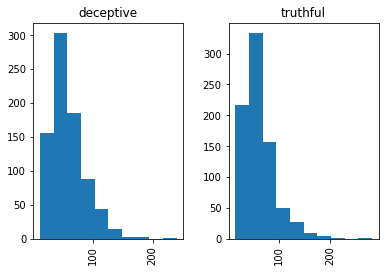

In [210]:
df.hist(column='review_uniq_count', by='deceptive')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa55e7dd9b0>,
      dtype=object)

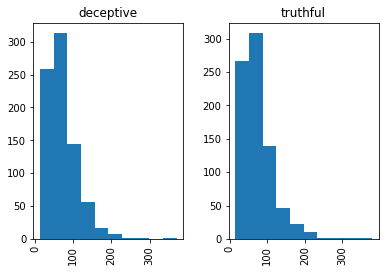

In [211]:
df.hist(column='review_words_count', by='deceptive')

Find the top 100 unique word in deceptive reviews and truthful review, get rid of the common words in these two sets

In [212]:
#Find word frequency in deceptive review
freq_deceptive = df[df['deceptive'] == "deceptive"].text.str.split(expand=True).stack().value_counts().to_frame()
freq_deceptive

,0
hotel,1984
room,1740
chicago,1036
stay,895
nt,538
...,...
refill,1
feetit,1
recreation,1
akin,1


In [213]:
#Find word frequency in truthful review
freq_truthful = df[df['deceptive'] == "truthful"].text.str.split(expand=True).stack().value_counts().to_frame()
freq_truthful

,0
room,1721
hotel,1654
stay,702
nt,568
great,551
...,...
3room,1
insinuation,1
sheratonsstarwood,1
feb,1


In [214]:
# Find deceptive and truthful review difference word
feature_df = freq_deceptive.loc[freq_deceptive.index.difference(freq_truthful.index), ]
feature_df

,0
12am,1
1495day,1
160th,1
1970s,1
1star,1
...,...
yikes,1
youidiot,1
youre,1
youve,2


In [215]:
feature_df = feature_df.T

In [216]:
#for col in feature_df.columns:
#    feature_df[col].values[:] = 0
#feature_df

In [217]:
for col in feature_df.columns:
    df[col] = df['splitted_text'].apply(lambda text: 1 if col in text else 0)

In [218]:
df

,id,deceptive,hotel,polarity,source,text,review_words_count,review_uniq_count,splitted_text,12am,1495day,160th,1970s,1star,200ish,32floor,32in,330pm,350average,37inch,3night,4diamond,4they,5100night,60anight,6am,830a,90yearold,aaahed,abassador,abrupt,abruptly,abruptness,accesible,accessibility,accessory,accomadations,accomedations,accomidations,accomondations,...,wellbeing,wellcleaned,welldesigned,welldone,wellington,wellknown,wellness,welloiled,wellstocked,wellthe,welt,wer,whatnot,whenver,wheres,whirl,whisk,wiener,willingly,willis,win,wink,wit,wobble,wold,wonderbar,woopee,workable,workeda,working,workstation,wound,wretched,yappy,yellowed,yikes,youidiot,youre,youve,yum
0,1,deceptive,hilton,negative,MTurk,stayed schicago hilton day night conference sa...,131,109,"{stay, cap, leave, nt, call, okay, fact, norma...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,deceptive,hilton,negative,MTurk,hotel locate mile train station quite hike tra...,47,42,"{train, extra, kid, kingsized, want, pay, lugg...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,deceptive,hilton,negative,MTurk,make reservation hilton chicago believe go sta...,95,73,"{settle, go, stay, rest, morning, many, found,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,deceptive,hilton,negative,MTurk,people think hilton think luxury know wish hal...,79,70,"{stay, go, problem, follow, noisy, cheaper, nt...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,deceptive,hilton,negative,MTurk,husband recently stayed stayed hilton chicago ...,100,82,"{go, love, recently, u, sound, clerk, nt, try,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,truthful,palmer,positive,TripAdvisor,beautiful place european charm complaint great...,31,27,"{love, never, european, great, pier, lobby, na...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1596,1597,truthful,palmer,positive,TripAdvisor,spent three night hotel girl weekend staff won...,30,28,"{train, three, directly, choice, great, take, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1597,1598,truthful,palmer,positive,TripAdvisor,couple year since stayed get night last weeken...,38,31,"{hotwire, amaze, great, lobby, distance, year,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1598,1599,truthful,palmer,positive,TripAdvisor,stayed october november cconference beautiful ...,31,28,"{art, stay, coffee, maker, november, ala, frie...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [219]:
df_input = df.drop(columns=['id', 'hotel', 'polarity', 'source', 'text', 'deceptive', 'splitted_text'])
df_input

,review_words_count,review_uniq_count,12am,1495day,160th,1970s,1star,200ish,32floor,32in,330pm,350average,37inch,3night,4diamond,4they,5100night,60anight,6am,830a,90yearold,aaahed,abassador,abrupt,abruptly,abruptness,accesible,accessibility,accessory,accomadations,accomedations,accomidations,accomondations,accord,accurate,accurately,acheater,achieve,acknowledgement,acommodations,...,wellbeing,wellcleaned,welldesigned,welldone,wellington,wellknown,wellness,welloiled,wellstocked,wellthe,welt,wer,whatnot,whenver,wheres,whirl,whisk,wiener,willingly,willis,win,wink,wit,wobble,wold,wonderbar,woopee,workable,workeda,working,workstation,wound,wretched,yappy,yellowed,yikes,youidiot,youre,youve,yum
0,131,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,95,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,79,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,31,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1596,30,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1597,38,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1598,31,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def decisionTreeAccCrossFold(X,y):
    clf = DecisionTreeClassifier()
    return cross_val_score(clf, X, y, cv=10).mean()

decisionTreeAccCrossFold(df_input, df['deceptive'])

0.5475000000000001